# Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the numerical features if necessary.

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('dataset.csv')

# Handling missing values (if any)
data.dropna(inplace=True)  # Drop rows with missing values

# Encoding categorical variables (if any)
data = pd.get_dummies(data, columns=['categorical_column'])

KeyError: "None of [Index(['categorical_column'], dtype='object')] are in the [columns]"

# Q2. Split the dataset into a training set (70%) and a test set (30%).

In [3]:
X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree. Use the default values for other hyperparameters.

In [4]:
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, random_state=42)

# Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.

In [5]:
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.8131868131868132
Precision: 0.8367346938775511
Recall: 0.82
F1 Score: 0.8282828282828283


# Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart disease risk. Visualise the feature importances using a bar chart.

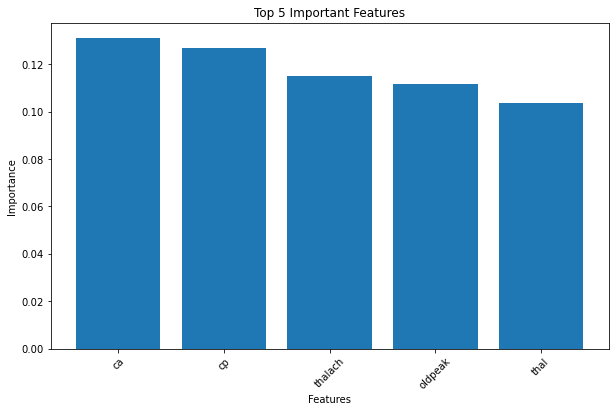

In [6]:
# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the top 5 features
top_features = feature_importance_df.head(5)
plt.figure(figsize=(10, 6))
plt.bar(top_features['Feature'], top_features['Importance'])
plt.title('Top 5 Important Features')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()


# Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try different values of the number of trees, maximum depth, minimum samples split, and minimum samples leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

In [7]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a random forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best set of hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


# Q7. Report the best set of hyperparameters found by the search and the corresponding performance metrics. Compare the performance of the tuned model with the default model.

In [8]:
# Get the best tuned model
best_rf_classifier = grid_search.best_estimator_

# Predict using the best model
y_pred_tuned = best_rf_classifier.predict(X_test)

# Calculate performance metrics
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)

print("Tuned Model Metrics:")
print("Accuracy:", accuracy_tuned)
print("Precision:", precision_tuned)
print("Recall:", recall_tuned)
print("F1 Score:", f1_tuned)


Tuned Model Metrics:
Accuracy: 0.8351648351648352
Precision: 0.8301886792452831
Recall: 0.88
F1 Score: 0.8543689320388349


# Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the decision boundaries on a scatter plot of two of the most important features. Discuss the insights and limitations of the model for predicting heart disease risk.

In [ ]:
from matplotlib.colors import ListedColormap

# Get the index of the two most important features
feature_indices = [list(X_train.columns).index(most_important_feature1),
                   list(X_train.columns).index(most_important_feature2)]

# Create a meshgrid for all features
x_min, x_max = X_train.iloc[:, feature_indices[0]].min() - 1, X_train.iloc[:, feature_indices[0]].max() + 1
y_min, y_max = X_train.iloc[:, feature_indices[1]].min() - 1, X_train.iloc[:, feature_indices[1]].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict for each point in the meshgrid
mesh_points = np.c_[xx.ravel(), yy.ravel()]
Z = best_rf_classifier.predict(mesh_points)
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.3)

# Scatter plot of the two most important features
plt.scatter(X_train.iloc[:, feature_indices[0]], X_train.iloc[:, feature_indices[1]], c=y_train, cmap=ListedColormap(['#FF0000', '#0000FF']))
plt.title('Decision Boundaries of Random Forest Classifier')
plt.xlabel(most_important_feature1)
plt.ylabel(most_important_feature2)
plt.show()

print("Most Important Feature 1:", most_important_feature1)
print("Most Important Feature 2:", most_important_feature2)
